# Tarea 2 Yuriko Yamamoto

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

In [79]:
N = 20000
x = randn(N)
length(x)

20000

In [6]:
?minimum

search: 

```
minimum(A, dims)
```

Compute the minimum value of an array over the given dimensions.

```
minimum(itr)
```

Returns the smallest element in a collection.


minimum minimum! DimensionMismatch



In [44]:
xinf = minimum(x)

-3.7309075092117303

In [45]:
xsup = maximum(x)

3.8483743973283975

In [46]:
xinf = minimum(x)
    xsup = maximum(x)
    Δx = (xsup - xinf)/10
    print("Δx = ",Δx, " xinf = ", xinf, " xsup = ", xsup) 
    

Δx = 0.7579281906540128 xinf = -3.7309075092117303 xsup = 3.8483743973283975

In [50]:
function histograma(num::Array, nhist::Int)
    
    #Calculando el ínfimo y supremo del conjunto de números aleatrorios.
    xinf = minimum(num)
    xsup = maximum(num)
    
    #Calculando el tamaño de los intervalos (bin).
    Δx = (xsup - xinf) / nhist
    #print("Δx = ",Δx, " xinf = ", xinf, " xsup = ", xsup) 
    
    #Creando el arreglo de frecuencias e iniciándolos en cero.
    frecs = zeros(nhist)
    
    #Frecuencias
    for i in num
        a = xinf 
        b = xinf + Δx
        for j in 1:nhist
            if i >= a && i < b
                frecs[j] += 1
                break
            end 
            #a += Δx
            a = a + Δx
            #b += Δx
            b = b + Δx
        end
        if i == xsup
            frecs[nhist] = frecs[nhist] + 1
        end
    end    
    return frecs 
end
    
    

histograma (generic function with 1 method)

In [51]:
frqs = histograma(x,30)

30-element Array{Float64,1}:
    2.0
    8.0
   11.0
   32.0
   65.0
  138.0
  238.0
  376.0
  571.0
  821.0
 1181.0
 1446.0
 1674.0
    ⋮  
 1337.0
  957.0
  703.0
  474.0
  330.0
  174.0
  106.0
   39.0
   26.0
   13.0
    4.0
    3.0

In [53]:
?histograma

search: 

No documentation found.

`histograma` is a generic `Function`.

```julia
# 1 method for generic function "histograma":
histograma(num::Array{T,N}, nhist::Int64) at In[50]:4
```


histograma



In [54]:
hist(histograma, Δx)

LoadError: LoadError: MethodError: `hist` has no method matching hist(::Function, ::Float64)
while loading In[54], in expression starting on line 1

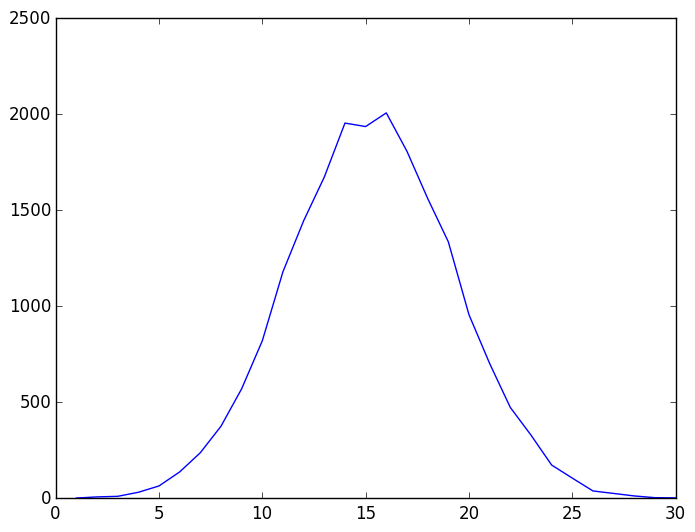

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3207f8e90>

In [56]:
#Histograma
using PyPlot
#P.figure()
#n, bins, patches = P.hist
#fig = plt.figure()
plot(1:30,frqs)

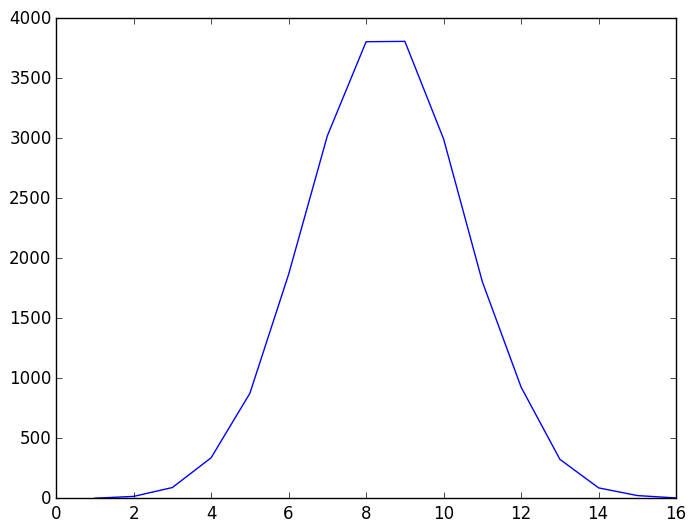

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320f5e0d0>

In [77]:
bins1, y1 = PyPlot.hist(x,30)
plot(1:16,y1)
#y = hist(x,30)
#plot(1:30,y1)

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


In [80]:
function promedioy(p)
    suma = 0.0
    for xi in p
        suma = suma + xi
    end
    return suma/length(p)
end

promedioy (generic function with 1 method)

In [81]:
promedioy(x)

-0.008373465789777006

In [82]:
?mean

search: 

```
mean(v[, region])
```

Compute the mean of whole array `v`, or optionally along the dimensions in `region`. Note: Julia does not ignore `NaN` values in the computation. For applications requiring the handling of missing data, the `DataArray` package is recommended.


mean mean! median median! SegmentationFault macroexpand module_parent



In [83]:
mean(x)

-0.008373465789777055

In [84]:
@time promedioy(x)

-0.008373465789777006

0.000029 seconds (149 allocations: 10.167 KB)


In [85]:
@time mean(x)

-0.008373465789777055

0.000022 seconds (5 allocations: 176 bytes)


In [86]:
function varianzay(v)
    suma = 0.0
   
    for vi in v
        suma = suma + (vi^2)
    end
    d = suma/length(v)
    
    prom = promedioy(v)
    
    var1 = d - prom^2
    
return var1
end

varianzay (generic function with 1 method)

In [87]:
varianzay(x)

0.9902212043731281

In [88]:
var(x)

0.990270717909021

In [89]:
@time varianzay(x)

0.9902212043731281

0.000050 seconds (5 allocations: 176 bytes)


In [90]:
@time var(x)

0.990270717909021

0.000030 seconds (8 allocations: 288 bytes)


In [91]:
function online_variance(data)
    n = 0
    mean1 = 0.0
    M2 = 0.0
     
    for x in data
        n += 1
        delta = x - mean1
        mean1 += delta/n
        M2 += delta*(x - mean1)
    end

    #if n < 2
        #return float('NaN')
    #else
    return (mean1, M2 / (n - 1))
end

online_variance (generic function with 1 method)

In [92]:
online_variance(x)

(-0.008373465789777056,0.9902707179090153)

In [93]:
@time online_variance(x)

(-0.008373465789777056,0.9902707179090153)

0.000197 seconds (5 allocations: 192 bytes)


## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

In [94]:
#Definir función
f(t) = t^2+1

f (generic function with 1 method)

In [98]:
function IntegracionSimpson(F,a,b)
    return F(a), F(b)
end

IntegracionSimpson (generic function with 2 methods)

In [99]:
IntegracionSimpson(f, 0.0, 1.0)

(1.0,2.0)